# Código de Introducción (NO MODIFICAR)

In [113]:
import pandas as pd
import numpy as np
import seaborn as sns
from sklearn.metrics import mean_absolute_error, make_scorer
from sklearn.model_selection import KFold, cross_val_score

In [114]:
# Esta es la función que evaluará sus resultados
def evaluate(model, X, Y):
    strat_k_fold = KFold(n_splits=3, shuffle=True, random_state=2020)
    mae = make_scorer(mean_absolute_error)
    return np.mean(cross_val_score(model, X, Y, scoring = mae, cv = strat_k_fold))

In [115]:
# Leemos los datos
df = pd.read_csv('BienesRaices.csv', encoding = 'utf-8')
df

,title,currency,properties,neighborhood,title-2,title-3,price_dop
0,Disponible apartamento Juan dolió un reservaci...,DOP,"{""property_type"": ""Sin Amueblar"", ""rooms_quant...",Residecial brisa marina\n,Boca Chica,Santo Domingo,1000.00
1,"Hermosos Apartamentos en ""Los Jardines de Madr...",DOP,"{""property_type"": ""Sin Amueblar"", ""rooms_quant...",Madre Vieja Norte,San Cristóbal,San Cristóbal,3950000.00
2,Vendo apto amplio de 260 Metros con areas soci...,USD,"{""property_type"": ""Sin Amueblar"", ""rooms_quant...",El Vergel,Distrito Nacional,Santo Domingo,18774807.00
3,Excelente solar a pasos de Guavaberry,DOP,"{""terrain_usage_type"": ""Comercial"", ""terrain_s...",Otro,Guayacanes,San Pedro de Macorís,2400000.00
4,Moderno Apartamento de alquiler en Piantini,USD,"{""property_type"": ""Con linea blanca"", ""rooms_q...",Piantini,Distrito Nacional,Santo Domingo,103600.00
...,...,...,...,...,...,...,...
14861,Apartamento segundo piso mirador norte,USD,"{""property_type"": ""Sin Amueblar"", ""rooms_quant...",Mirador norte,Distrito Nacional,Santo Domingo,8967072.00
14862,"Solar 1,760 mts Canabacoa santiago de los caba...",DOP,"{""terrain_usage_type"": ""Otros"", ""terrain_squar...",NaN,Santiago de los Caballeros,Santiago,10560000.00
14863,Impresionantes Apartamentos de un Lujo Acequib...,USD,"{""property_type"": ""Sin Amueblar"", ""rooms_quant...",NaN,Bávaro/Punta Cana,La Altagracia,12543748.40
14864,Apartamento amueblado Bella vista,USD,"{""property_type"": ""Amueblado"", ""rooms_quantity...",Bella vista,Distrito Nacional,Santo Domingo,8967072.00


### Columna a predecir: price_dop 

# Modificar de aquí en adelante:

### Preprocesado

In [118]:
# Las columnas price y price_usd son redundantes, nos quedamos con price_dop
X = df.copy().drop(['price_dop'], axis=1)
Y = df.copy()['price_dop']

### Exploración

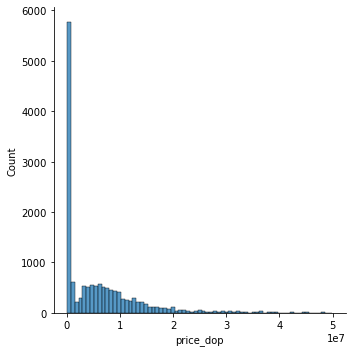

In [112]:
sns.displot(Y)

### Ejemplo de un modelo sencillo

In [120]:
# Hagamos un modelo de árbol sencillo con la provincia como único predictor
from sklearn.tree import DecisionTreeRegressor
model = DecisionTreeRegressor(random_state=42)
X = X.filter(['title-3'], axis=1)
X = pd.get_dummies(X, prefix_sep='_', sparse=True)
model.fit(X,Y)

DecisionTreeRegressor(random_state=42)

In [121]:
evaluate(model, X, Y)

5800388.515774037

In [ ]:
# El modelo se equivoca por 5 millones 800 mil pesos en promedio
# A construir un modelo mejor!